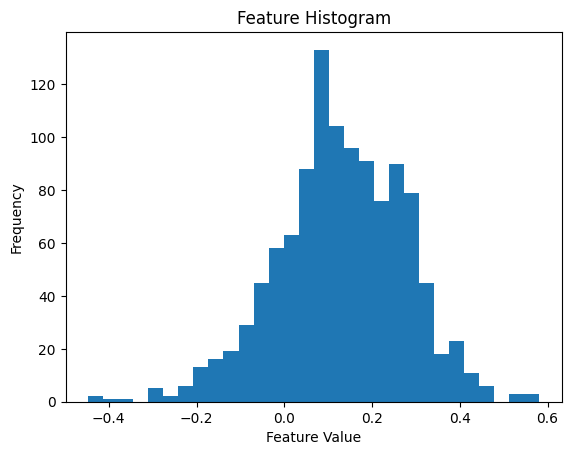

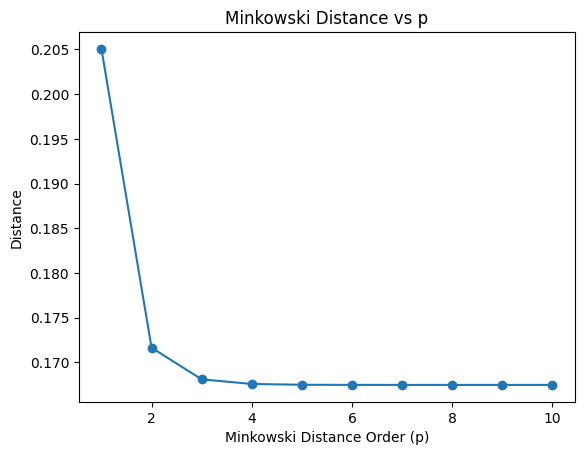

Centroids:
                embed_0   embed_1   embed_2   embed_3   embed_4   embed_5  \
binary_label                                                               
0            -0.159767  0.142137  0.101010  0.195075 -0.483250 -0.165696   
1            -0.196129  0.100786  0.109304  0.217669 -0.501275 -0.215422   

               embed_6   embed_7   embed_8   embed_9  ...  embed_375  \
binary_label                                          ...              
0             0.167479  0.122250  0.135688 -0.046579  ...  -0.320871   
1             0.123194  0.159113  0.117358 -0.073708  ...  -0.350794   

              embed_376  embed_377  embed_378  embed_379  embed_380  \
binary_label                                                          
0             -0.063993  -0.027300  -0.070217  -0.224008  -0.173524   
1             -0.105649  -0.004486  -0.146509  -0.194904  -0.193729   

              embed_381  embed_382  embed_383    output  
binary_label                                       

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski

# 1. Load Data
def load_dataset(file_name):
    # Load Excel file using pandas
    return pd.read_excel(file_name)

# 2. Calculate Class Centroids, Spread, and Distance
def calculate_class_metrics(df, label_column):
    # Group by class and calculate centroids and spread
    centroids = df.groupby(label_column).mean()
    spreads = df.groupby(label_column).std()
    return centroids, spreads

def compute_interclass_distance(centroid_1, centroid_2):
    # Calculate Euclidean distance between two centroids
    return np.linalg.norm(centroid_1 - centroid_2)

# 3. Histogram and Feature Analysis
def plot_feature_histogram(feature_values, bins=30):
    plt.hist(feature_values, bins=bins)
    plt.xlabel('Feature Value')
    plt.ylabel('Frequency')
    plt.title('Feature Histogram')
    plt.show()

def compute_mean_variance(feature_values):
    # Calculate mean and variance of a feature
    return np.mean(feature_values), np.var(feature_values)

# 4. Minkowski Distance Calculation
def compute_minkowski_distances(vec1, vec2, p_range):
    distances = []
    for p in p_range:
        dist = minkowski(vec1, vec2, p)
        distances.append(dist)
    return distances

def plot_minkowski_distances(p_range, distances):
    plt.plot(p_range, distances, marker='o')
    plt.xlabel('Minkowski Distance Order (p)')
    plt.ylabel('Distance')
    plt.title('Minkowski Distance vs p')
    plt.show()

# 5. Train-Test Split
def split_data(X, y, test_size=0.3):
    return train_test_split(X, y, test_size=test_size)

# 6. k-NN Classification
def train_knn(X_train, y_train, neighbors=3):
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train, y_train)
    return knn

def calculate_accuracy(knn, X_test, y_test):
    return knn.score(X_test, y_test)

# 7. Prediction
def predict_classes(knn, X_test):
    return knn.predict(X_test)

# 8. Confusion Matrix and Performance Metrics
def compute_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

def compute_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    return precision, recall, f1

# Main Program
if __name__ == "__main__":
    # Load data
    file_path_1 = r"C:\Users\DELL\OneDrive\Desktop\ML\Classification_training.xlsx"
    file_path_2 = r"C:\Users\DELL\OneDrive\Desktop\ML\training_mathbert.xlsx"
    df = load_dataset(file_path_2)

    # Use actual column names from your dataset
    label_column = 'output'
    feature_1 = 'embed_1'
    feature_2 = 'embed_2'

    # Convert output to binary class labels
    df['binary_label'] = df[label_column].apply(lambda x: 1 if x >= 4 else 0)

    # Calculate centroids, spreads, and distance
    centroids, spreads = calculate_class_metrics(df, 'binary_label')
    interclass_distance = compute_interclass_distance(centroids.iloc[0], centroids.iloc[1])

    # Plot histogram and analyze feature
    plot_feature_histogram(df[feature_1])
    mean, variance = compute_mean_variance(df[feature_1])

    # Minkowski distance calculation
    p_range = range(1, 11)
    vector_1 = df[feature_1].values[:2]
    vector_2 = df[feature_2].values[:2]
    distances = compute_minkowski_distances(vector_1, vector_2, p_range)
    plot_minkowski_distances(p_range, distances)

    # Train-test split
    X = df.drop(columns=['output', 'binary_label'])  # Drop original output and use binary label
    y = df['binary_label']
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Convert to contiguous arrays (ensures compatibility with scikit-learn)
    X_train = np.ascontiguousarray(X_train)
    X_test = np.ascontiguousarray(X_test)
    y_train = np.ascontiguousarray(y_train)
    y_test = np.ascontiguousarray(y_test)

    # Train k-NN classifier
    knn = train_knn(X_train, y_train)

    # Evaluate accuracy
    accuracy = calculate_accuracy(knn, X_test, y_test)

    # Prediction
    predictions = predict_classes(knn, X_test)

    # Confusion matrix and performance metrics
    cm = compute_confusion_matrix(y_test, predictions)
    precision, recall, f1 = compute_metrics(y_test, predictions)

    # Print the results
    print("Centroids:\n", centroids)
    print("Spreads:\n", spreads)
    print("Interclass Distance between Centroids: ", interclass_distance)
    print("Mean of Feature: ", mean)
    print("Variance of Feature: ", variance)
    print("Minkowski Distances: ", distances)
    print("k-NN Accuracy: ", accuracy)
    print("Confusion Matrix:\n", cm)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1-Score: ", f1)
